In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Final Cleaned Cafe Sales Data.csv')
print(df.to_string())

     Transaction ID      Item  Quantity  Price Per Unit  Total Spent  Payment Method     Location Transaction Date
0       TXN_1961373    Coffee      2.00             2.0          4.0     Credit Card     Takeaway         9/8/2023
1       TXN_4977031      Cake      4.00             3.0         12.0            Cash     In-store        5/16/2023
2       TXN_4271903    Cookie      4.00             1.0          4.0     Credit Card     In-store        7/19/2023
3       TXN_7034554     Salad      2.00             5.0         10.0     Unspecified  Unspecified        4/27/2023
4       TXN_3160411    Coffee      2.00             2.0          4.0  Digital Wallet     In-store        6/11/2023
5       TXN_2602893  Smoothie      5.00             4.0         20.0     Credit Card  Unspecified        3/31/2023
6       TXN_4433211     Juice      3.00             3.0          9.0     Unspecified     Takeaway        10/6/2023
7       TXN_6699534  Sandwich      4.00             4.0         16.0            

In [5]:
print(df.dtypes)

Transaction ID       object
Item                 object
Quantity            float64
Price Per Unit      float64
Total Spent         float64
Payment Method       object
Location             object
Transaction Date     object
dtype: object


In [6]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

In [7]:
print(df.dtypes)

Transaction ID              object
Item                        object
Quantity                   float64
Price Per Unit             float64
Total Spent                float64
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
dtype: object


In [8]:
min_date = df['Transaction Date'].min()
max_date = df['Transaction Date'].max()

total_revenue = df['Total Spent'].sum()
print(f"The cafes total revenue for the period {min_date} to {max_date} is {total_revenue}")

The cafes total revenue for the period 2023-01-01 00:00:00 to 2023-12-31 00:00:00 is 89118.0


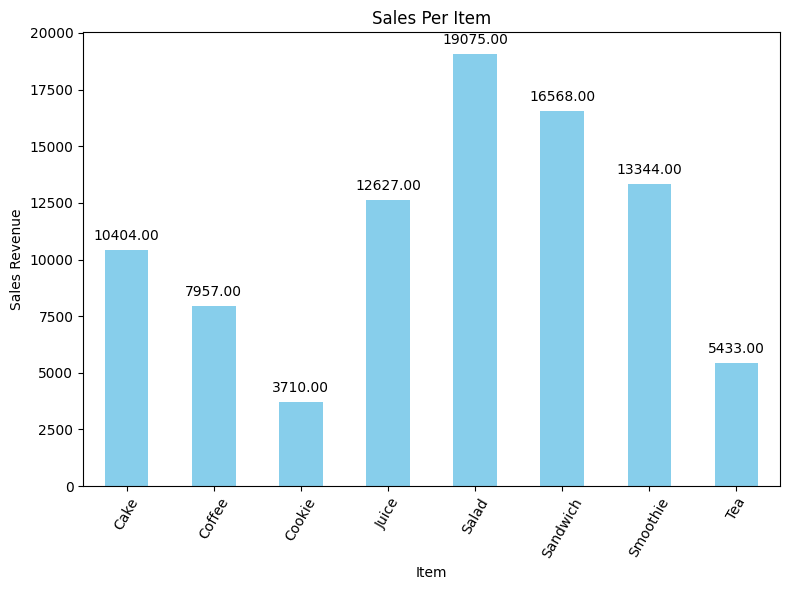

In [43]:
#Plot Sales Revenue Per Item
plt.figure(figsize=(8, 6))
sales_per_item = df.groupby('Item')['Total Spent'].sum()
ax = sales_per_item.plot(kind='bar', color ='skyblue')
plt.title('Sales Per Item')
plt.xlabel('Item')
plt.ylabel('Sales Revenue')
plt.xticks(rotation=60)
plt.tight_layout()

# Show values on top of bars
for p in ax.patches:
   ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 5),  # 5 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')
plt.show()

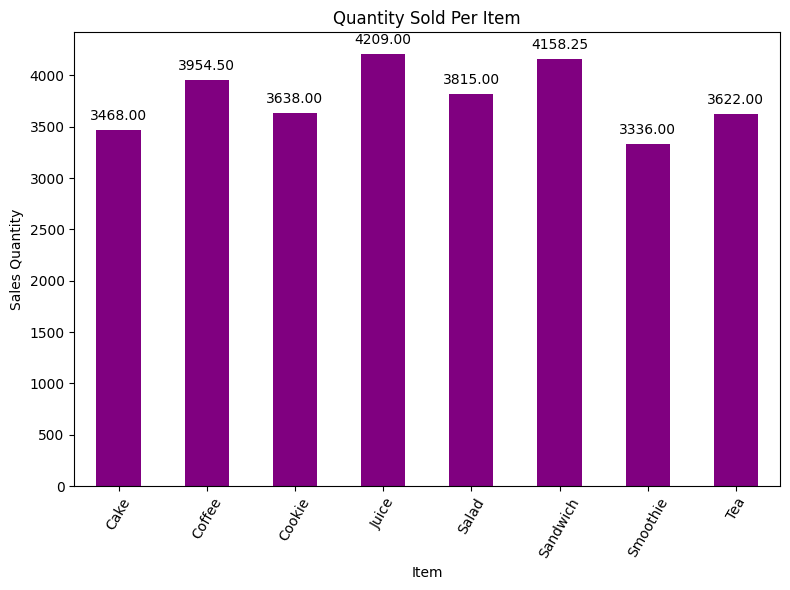

In [42]:
#Items By Quantity Sold

plt.figure(figsize=(8, 6))
quantity_per_item = df.groupby('Item')['Quantity'].sum()
ax = quantity_per_item.plot(kind='bar', color ='purple')
plt.title('Quantity Sold Per Item')
plt.xlabel('Item')
plt.ylabel('Sales Quantity')
plt.xticks(rotation=60)
plt.tight_layout()

# Show values on top of bars
for p in ax.patches:
   ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 5),  # 5 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')
plt.show()

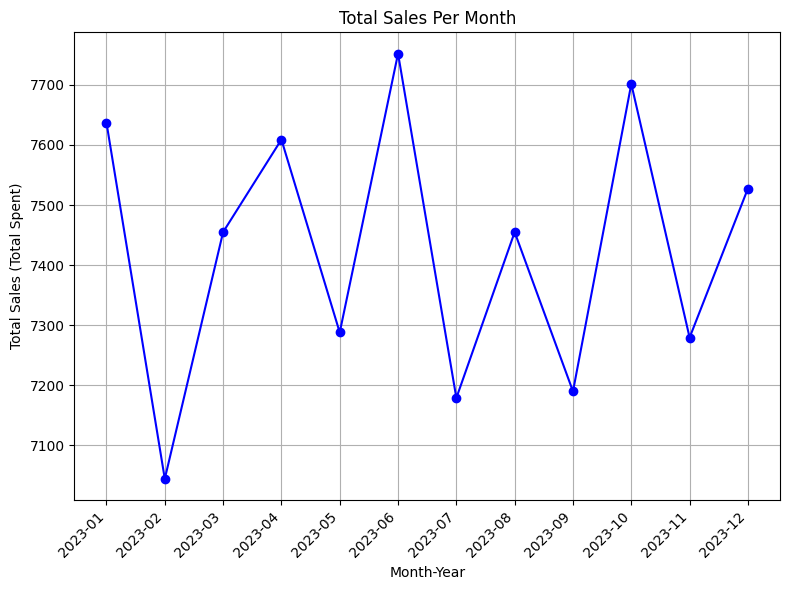

In [44]:
#Plot Monthly Sales in Line Chart

# Extract Year-Month from the Transaction Date
df['Month-Year'] = df['Transaction Date'].dt.to_period('M')
# Group by 'Month-Year' and sum the 'Total Spent'
monthly_sales = df.groupby('Month-Year')['Total Spent'].sum().reset_index()
# Convert 'Month-Year' back to string format for easier plotting
monthly_sales['Month-Year'] = monthly_sales['Month-Year'].astype(str)

# Plot the line chart
plt.figure(figsize=(8, 6))
plt.plot(monthly_sales['Month-Year'], monthly_sales['Total Spent'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Month-Year')
plt.ylabel('Total Sales (Total Spent)')
plt.title('Total Sales Per Month')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()